# Import Libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster import hierarchy
warnings.filterwarnings('ignore')
%matplotlib inline
import pickle
from sklearn.compose import ColumnTransformer
import streamlit

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/priyankamoree/Internship-Project/refs/heads/main/World_development_mesurement%20(1).csv")
df

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health Exp % GDP Health Exp/Capita  ...  \
0         $54,790,058,957             0.035               $60  ...   
1          $9,129,594,819             0.034               $22  ...   
2          $2,359,122,303             0.043               $15  ...   
3          $5,788,311,645             0.047              $152  ...   
4          $2,610,959,139             0.051               $12  ...   
...                   ...               ...               ...  ...   
2699                  NaN               NaN               NaN  ...   
2700  $16,244,600,000,000             0.179            $8,895  ...   
2701      $50,004,354,667             0.089            $1,308  ...   
2702     $381,286,223,859             0.046              $593  ...   
2703                  NaN               NaN               NaN  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
27

In [13]:
df.drop(columns=['Number of Records'],inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [15]:
df.describe()

Birth Rate  CO2 Emissions  Days to Start Business  Ease of Business  \
count  2585.000000   2.125000e+03             1718.000000        185.000000   
mean      0.022715   1.423071e+05               39.999418         94.875676   
std       0.011338   6.159288e+05               57.318588         54.791906   
min       0.007000   7.000000e+00                1.000000          1.000000   
25%       0.013000   1.360000e+03               13.000000         48.000000   
50%       0.020000   8.529000e+03               26.000000         94.000000   
75%       0.031000   5.910800e+04               45.000000        142.000000   
max       0.053000   8.286892e+06              694.000000        189.000000   

       Energy Usage  Health Exp % GDP  Hours to do Tax  Infant Mortality Rate  \
count  1.785000e+03       2395.000000      1416.000000            2444.000000   
mean   7.723684e+04          0.064170       302.068503               0.032813   
std    2.599239e+05          0.026325       273.299686               0.029968   
min    8.000000e+00          0.008000        12.000000               0.002000   
25%    3.737000e+03          0.046000       156.000000               0.009000   
50%    1.433800e+04          0.061000       239.000000               0.020000   
75%    4.185200e+04          0.079000       344.750000               0.053000   
max    2.727728e+06          0.225000      2600.000000               0.141000   

       Internet Usage  Lending Interest  Life Expectancy Female  \
count     2531.000000       1880.000000             2568.000000   
mean         0.239747          0.148103               71.159268   
std          0.260132          0.171829               10.708262   
min          0.000000          0.005000               39.000000   
25%          0.000000          0.080000               64.000000   
50%          0.100000          0.120000               75.000000   
75%          0.400000          0.173000               79.000000   
max          1.000000          4.965000               87.000000   

       Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
count           2568.000000         2537.000000      2484.000000   
mean              66.461838            0.578124         0.303051   
std                9.390217            0.474647         0.106577   
min               37.000000            0.000000         0.118000   
25%               61.000000            0.100000         0.204750   
50%               69.000000            0.500000         0.299500   
75%               73.250000            0.900000         0.402000   
max               88.000000            2.900000         0.500000   

       Population 15-64  Population 65+  Population Total  Population Urban  
count       2484.000000     2484.000000      2.704000e+03       2678.000000  
mean           0.623481        0.073465      3.145729e+07          0.562953  
std            0.069660        0.049541      1.242894e+08          0.245897  
min            0.474000        0.003000      1.887600e+04          0.082000  
25%            0.559000        0.033000      8.783360e+05          0.356000  
50%            0.642500        0.052000      5.800324e+06          0.560000  
75%            0.676000        0.112000      2.014089e+07          0.765000  
max            0.858000        0.244000      1.350695e+09          1.000000

# Examining the Datatypes

In [16]:
# For Converting the object Data-type to int/float we need to remove the special characters from those columns
#Remove $ from columns
df['GDP']=df['GDP'].astype(str).str.replace('$','',regex=True).str.replace(',','')
df['GDP']=pd.to_numeric(df['GDP'],errors='coerce')

df['Health Exp/Capita']=df['Health Exp/Capita'].astype(str).str.replace('$','',regex=True)
df['Health Exp/Capita']=pd.to_numeric(df['Health Exp/Capita'], errors='coerce')

df['Tourism Inbound']=df['Tourism Inbound'].astype(str).str.replace('$','',regex=True).str.replace(',', '')
df['Tourism Inbound'] = pd.to_numeric(df['Tourism Inbound'], errors='coerce')

df['Tourism Outbound']=df['Tourism Outbound'].astype(str).str.replace('$','',regex=True).str.replace(',', '')
df['Tourism Outbound'] = pd.to_numeric(df['Tourism Outbound'], errors='coerce')

# Remove %
df['Business Tax Rate']=df['Business Tax Rate'].astype(str).str.replace('%','',regex=True)
df['Business Tax Rate'] = pd.to_numeric(df['Business Tax Rate'], errors='coerce')

In [17]:
df.dtypes

Birth Rate                float64
Business Tax Rate         float64
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object

# Checking and Handling the missing value

In [18]:
df.isna().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          772
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [19]:
# Define thresholds
drop_threshold = 0.5  # Drop column if more than 50% missing
impute_threshold = 0.05  # Replace missing values if between 5% and 50% missing

# Function to calculate missing values and handle them
def handle_missing_values(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean()

    # Create a dictionary to store actions taken for each column
    actions = {}

    # Loop through columns and act based on the percentage of missing values
    for column in df.columns:
        pct_missing = missing_percentage[column]

        if pct_missing > drop_threshold:
            # Drop column if more than 50% values are missing
            df.drop(columns=[column], inplace=True)
            actions[column] = "Dropped"

        elif pct_missing > impute_threshold:
            # Impute/replace if between 5% and 50% missing (we'll use median for numeric and mode for categorical)
            if df[column].dtype == 'object':
                # For categorical columns, replace with mode
                df[column].fillna(df[column].mode()[0], inplace=True)
            else:
                # For numeric columns, replace with median
                df[column].fillna(df[column].median(), inplace=True)
            actions[column] = "Imputed"

        else:
            # Retain if less than 5% missing and handle minimally (could still impute if desired)
            if df[column].isnull().any():
                if df[column].dtype == 'object':
                    df[column].fillna(df[column].mode()[0], inplace=True)
                else:
                    df[column].fillna(df[column].mean(), inplace=True)
            actions[column] = "Retained"

    # Return cleaned dataframe and actions dictionary
    return df, actions

# Apply function to handle missing values
df_cleaned, actions_taken = handle_missing_values(df)

# Display actions taken for each column
print("Actions taken for each column:")
for column, action in actions_taken.items():
    print(f"{column}: {action}")

Actions taken for each column:
Birth Rate: Retained
Business Tax Rate: Imputed
CO2 Emissions: Imputed
Country: Retained
Days to Start Business: Imputed
Ease of Business: Dropped
Energy Usage: Imputed
GDP: Imputed
Health Exp % GDP: Imputed
Health Exp/Capita: Imputed
Hours to do Tax: Imputed
Infant Mortality Rate: Imputed
Internet Usage: Imputed
Lending Interest: Imputed
Life Expectancy Female: Imputed
Life Expectancy Male: Imputed
Mobile Phone Usage: Imputed
Population 0-14: Imputed
Population 15-64: Imputed
Population 65+: Imputed
Population Total: Retained
Population Urban: Retained
Tourism Inbound: Imputed
Tourism Outbound: Imputed


# Examining the Datatypes

In [20]:
df.isna().sum()  #checking the dtypes again

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

# Univariate Analysis

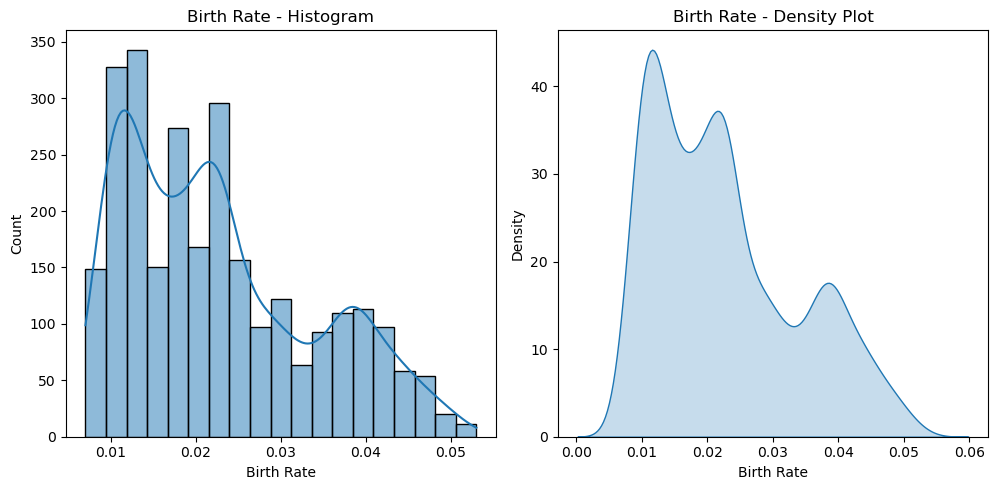

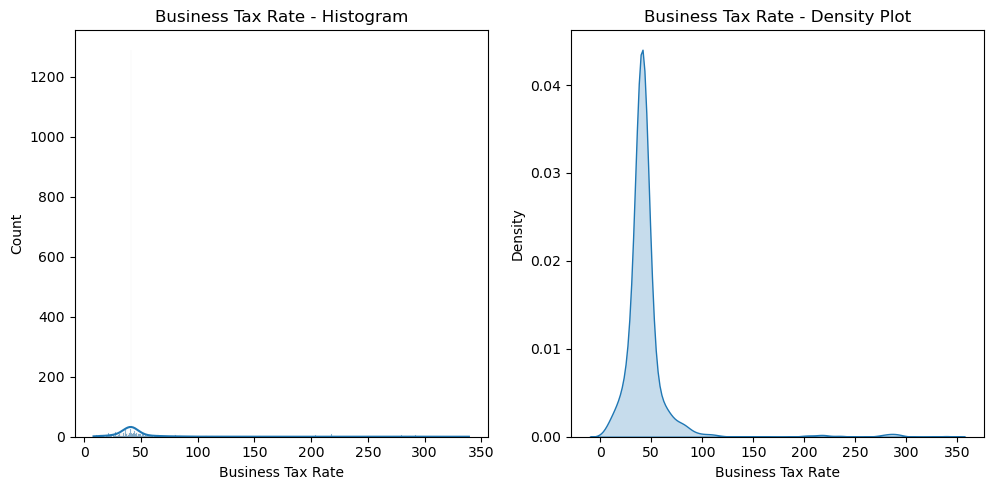

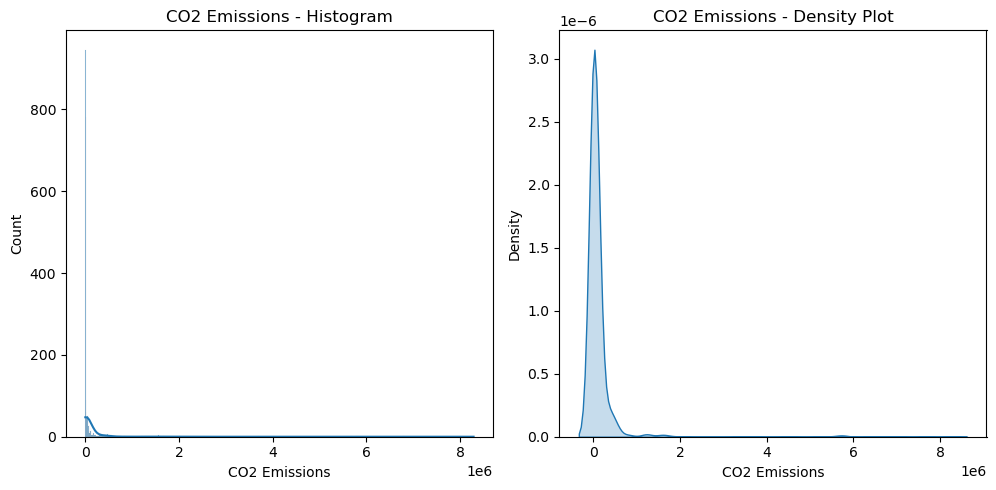

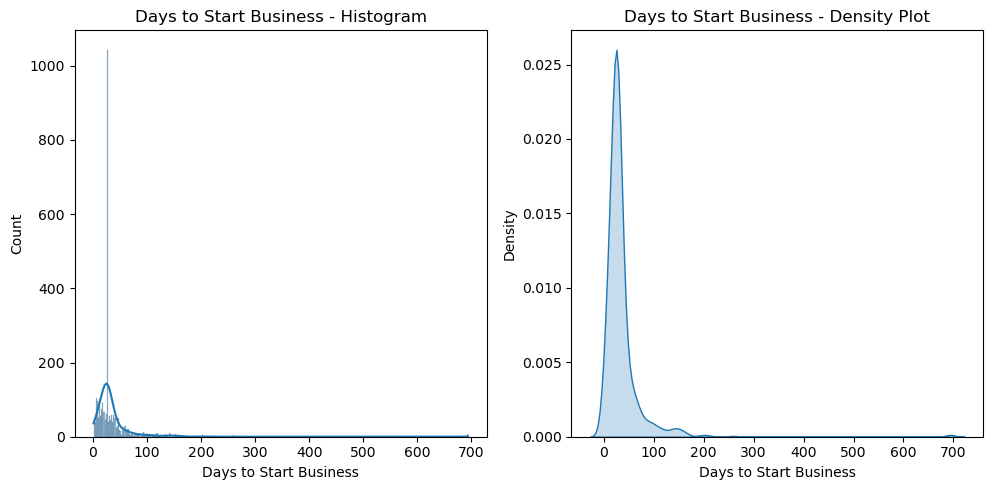

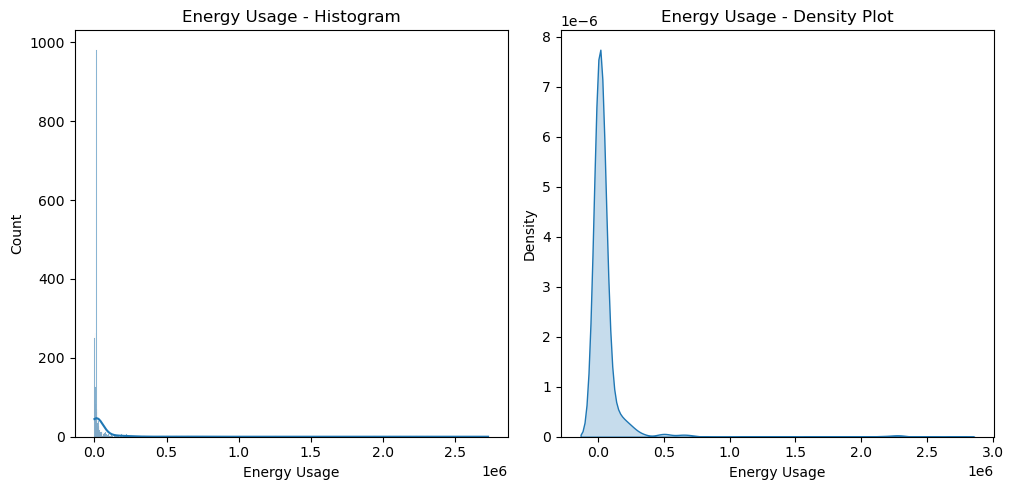

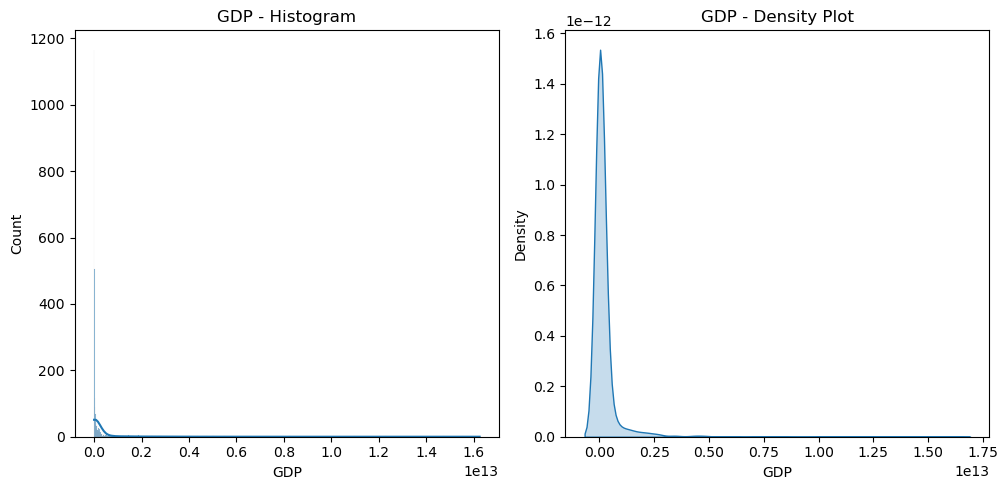

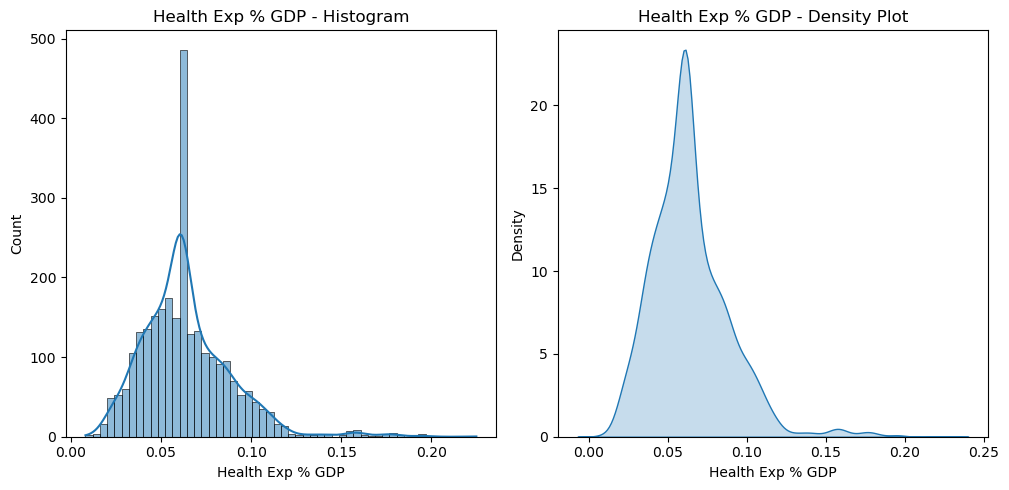

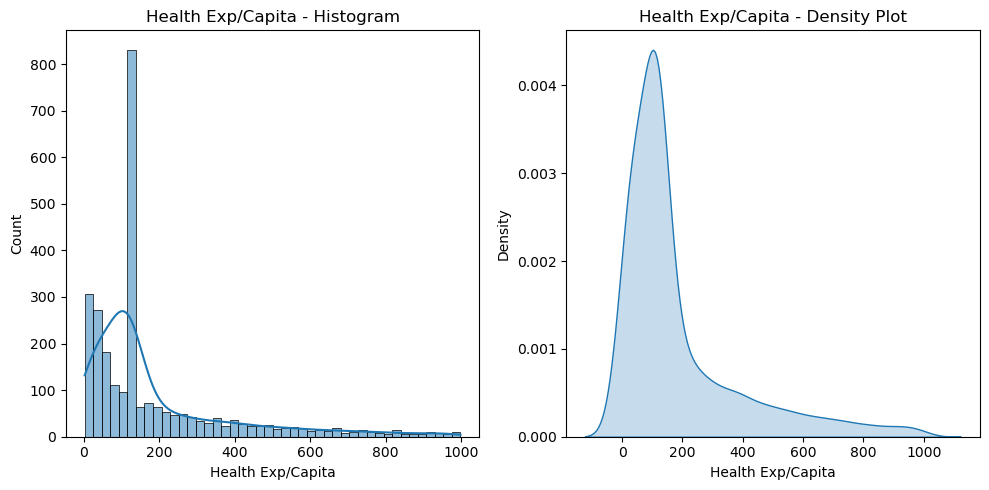

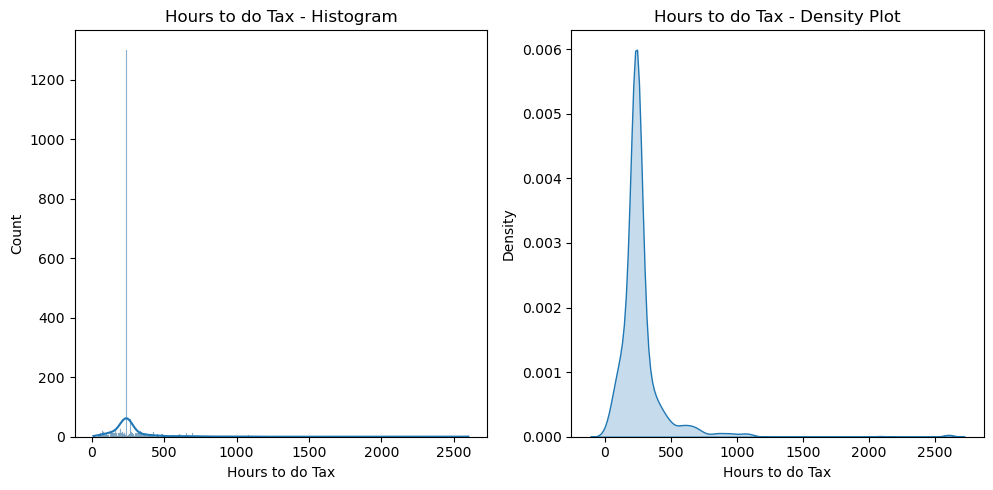

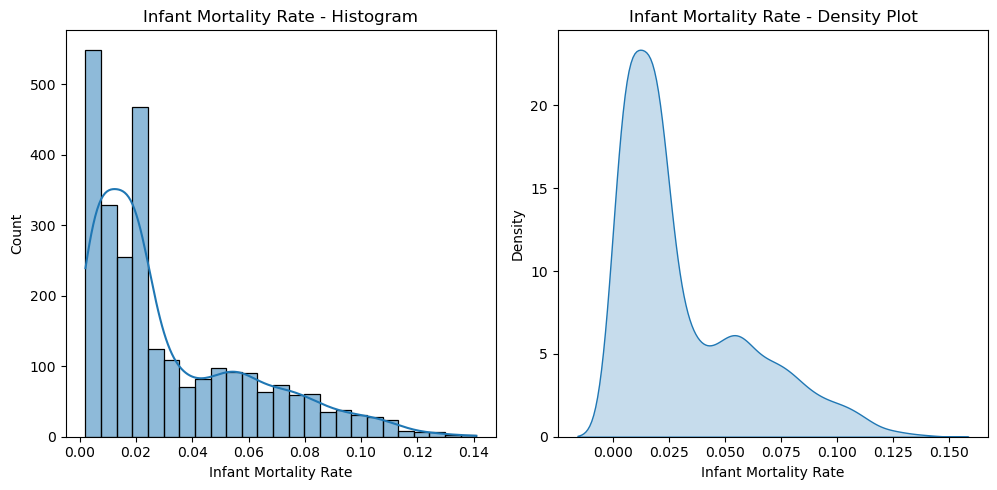

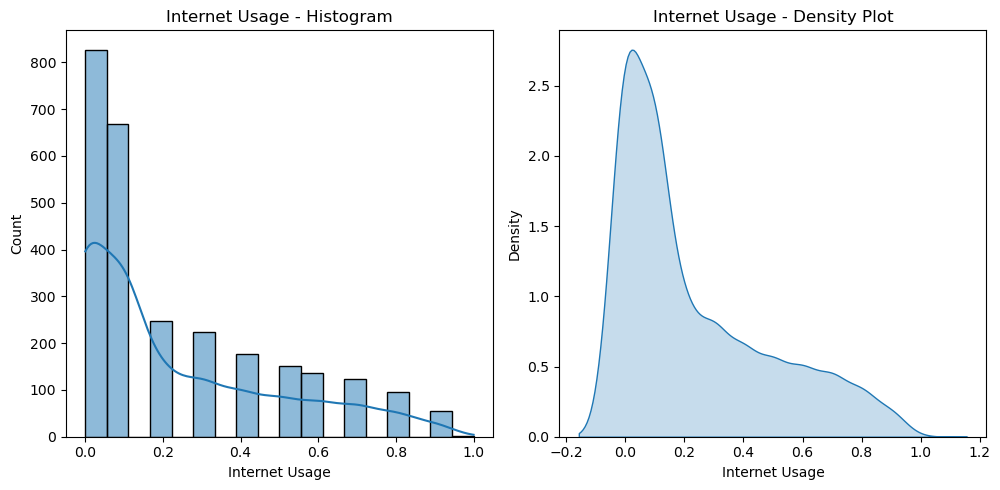

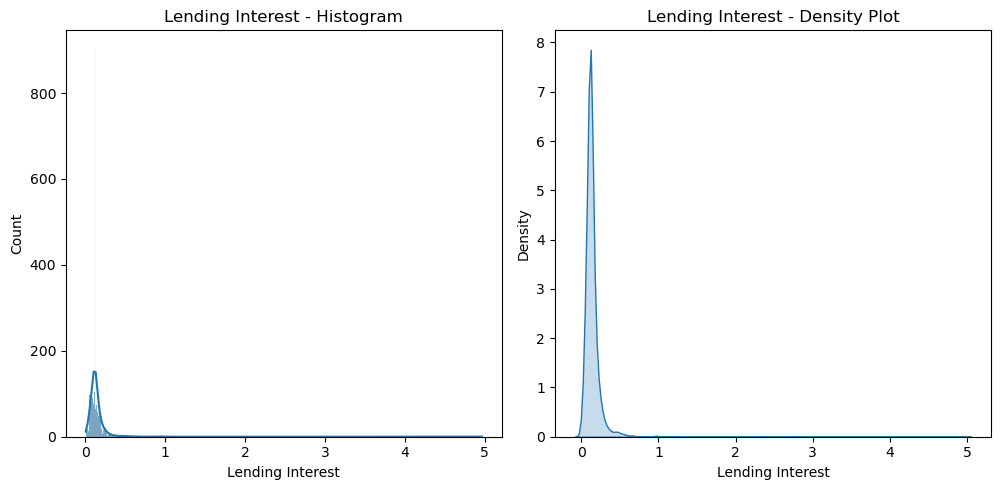

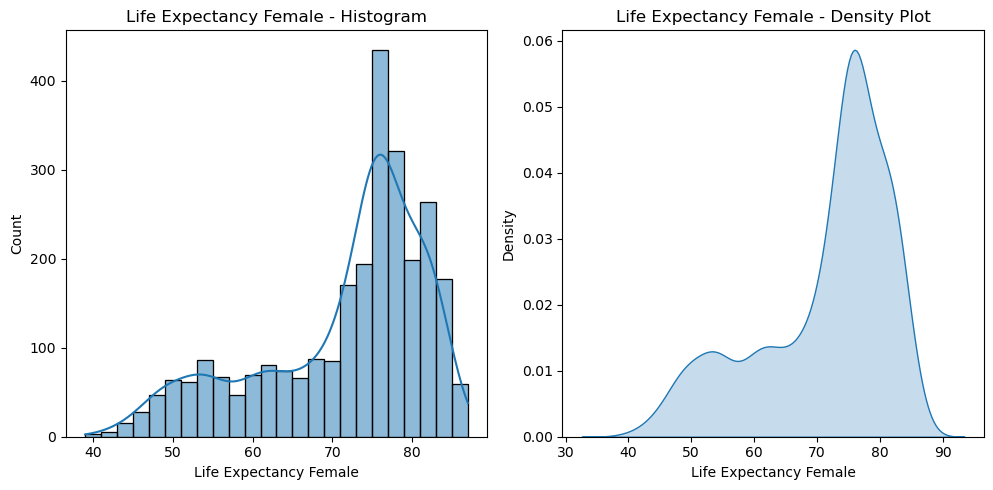

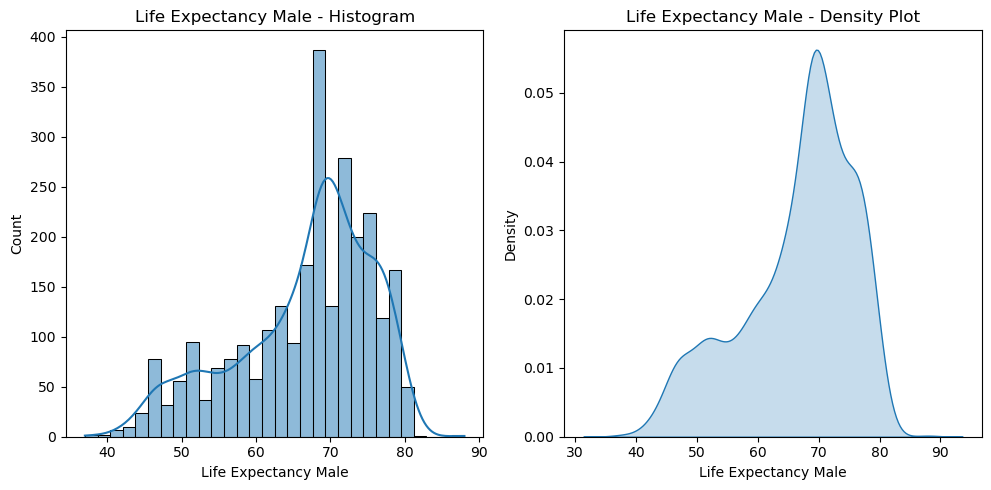

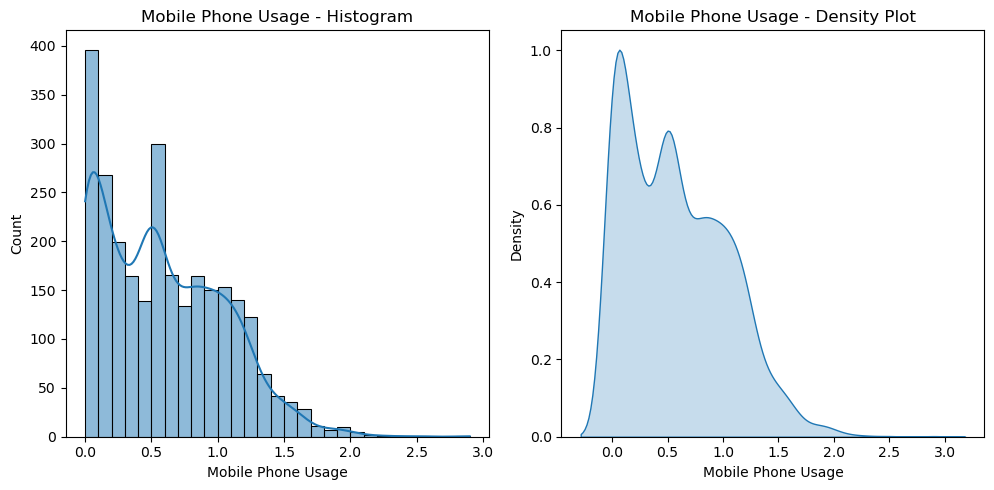

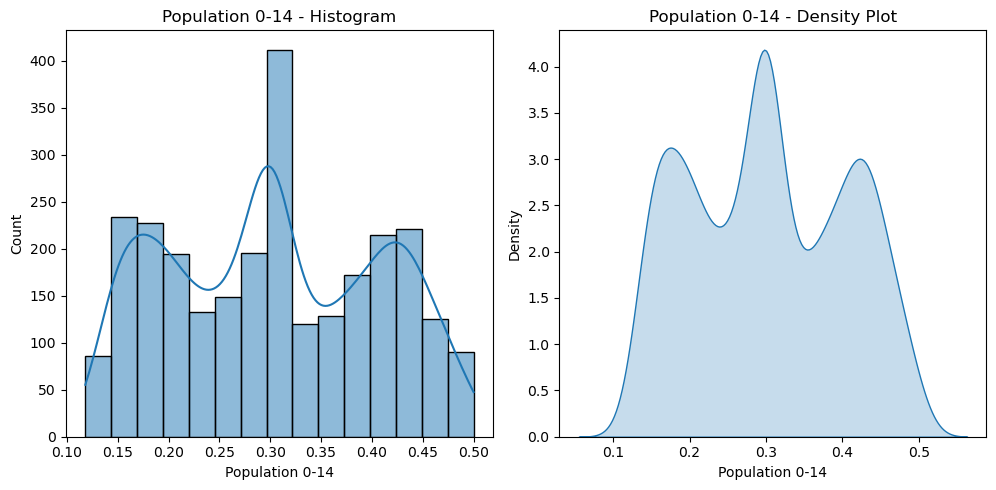

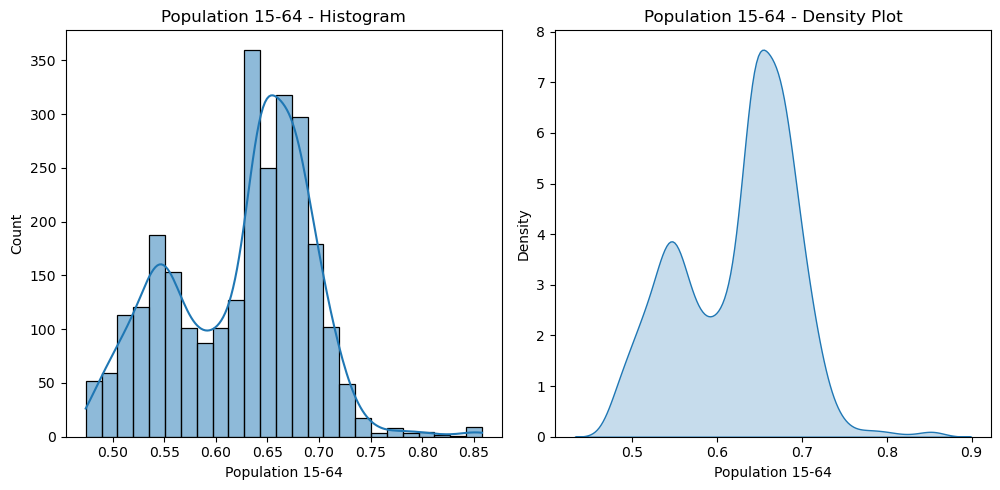

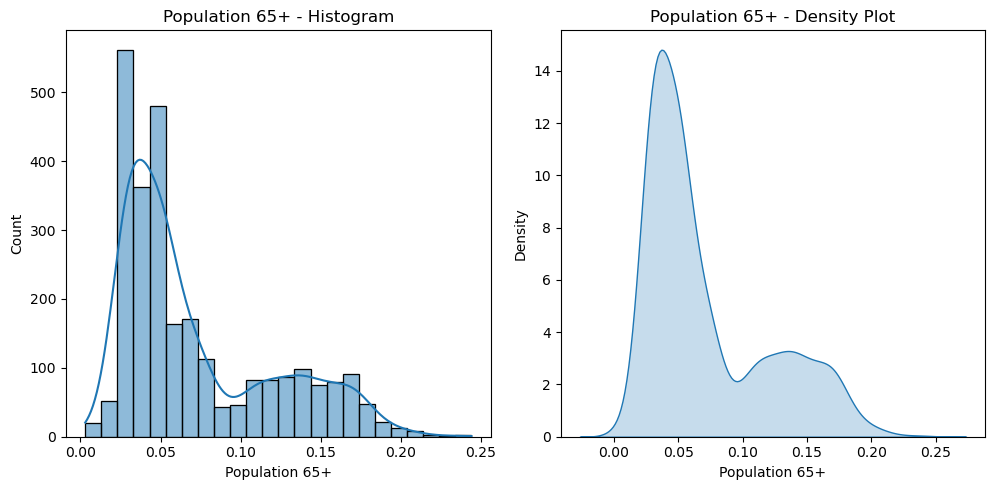

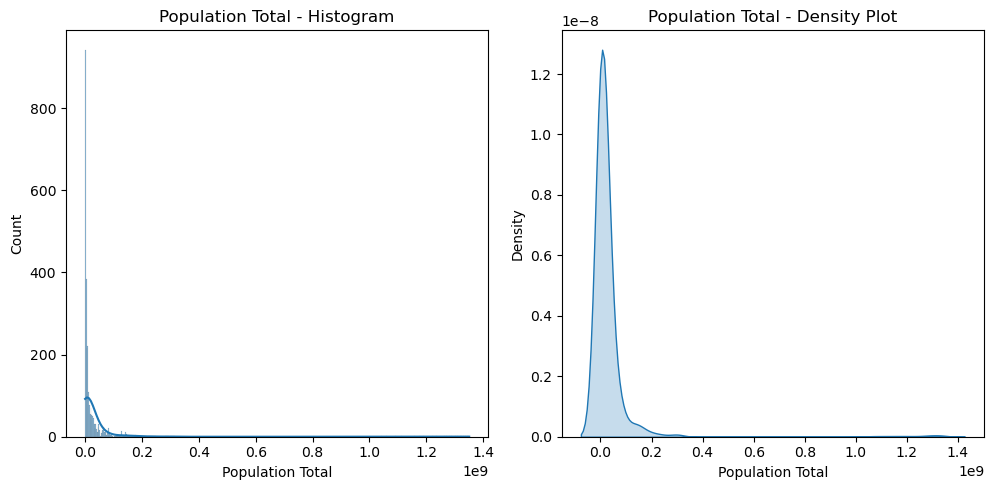

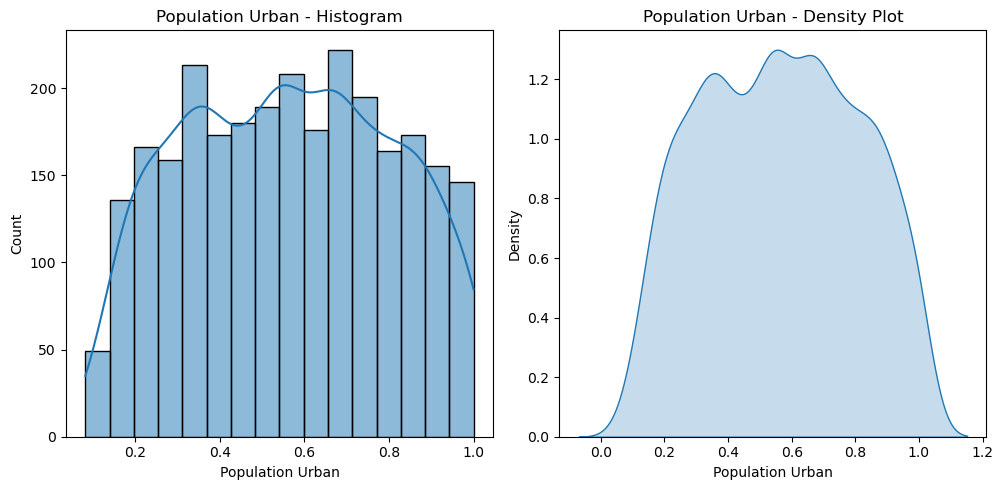

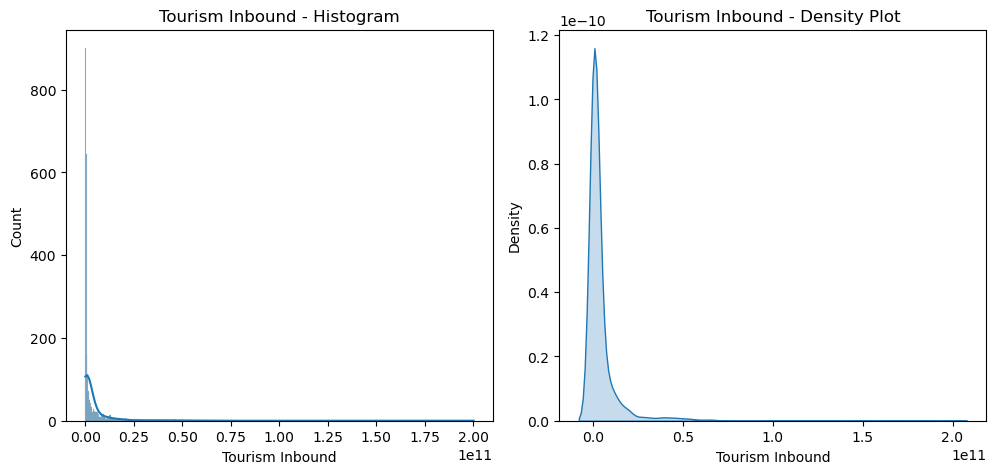

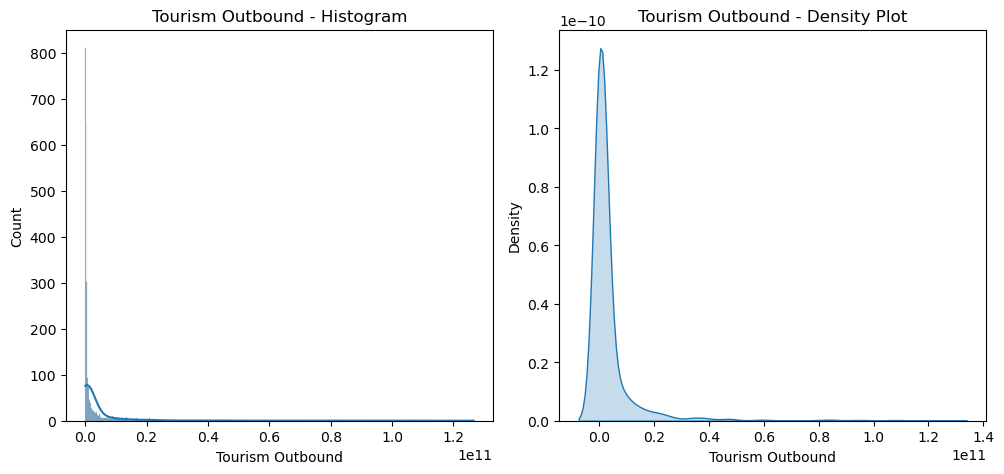

In [21]:
# Separate columns into numerical and categorical
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

# Histogram, Box plot, and Density plot for each numerical column and distribution of data across colunns
for column in numerical_columns:
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} - Histogram')

    # Density plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(df[column], shade=True)
    plt.title(f'{column} - Density Plot')

    plt.tight_layout()
    plt.show()

# Interpretation of Histogram
- Skewed:
   - Right-skewed (Positive skew): If the histogram has a long tail to the right, it indicates that most values are on the lower side, with some large outliers.
  - Left-skewed (Negative skew): A long tail to the left suggests most values are higher, with some small outliers.
- Uniform: If all bins have approximately the same height, it suggests a uniform distribution where values are equally spread.
- Bimodal or Multimodal: Multiple peaks (modes) suggest the presence of subgroups or clusters within the data.

In [22]:
# Frequency counts for each categorical column
for column in categorical_columns:
    frequency_counts = df[column].value_counts()
    print(f"Frequency Counts for {column}:\n", frequency_counts)

# # Bar Plot and Pie Chart for each categorical column
# for column in categorical_columns:
#     plt.figure(figsize=(25, 15))

#     # Bar plot
#     plt.subplot(1, 2, 1)
#     sns.countplot(x=df[column])
#     plt.title(f'{column} - Bar Plot')
#     plt.xticks(rotation=90)

#     plt.tight_layout()
#     plt.show()

Frequency Counts for Country:
 Algeria                  13
Angola                   13
Turkey                   13
Ukraine                  13
United Kingdom           13
                         ..
Malaysia                 13
Maldives                 13
Mongolia                 13
Myanmar                  13
Virgin Islands (U.S.)    13
Name: Country, Length: 208, dtype: int64


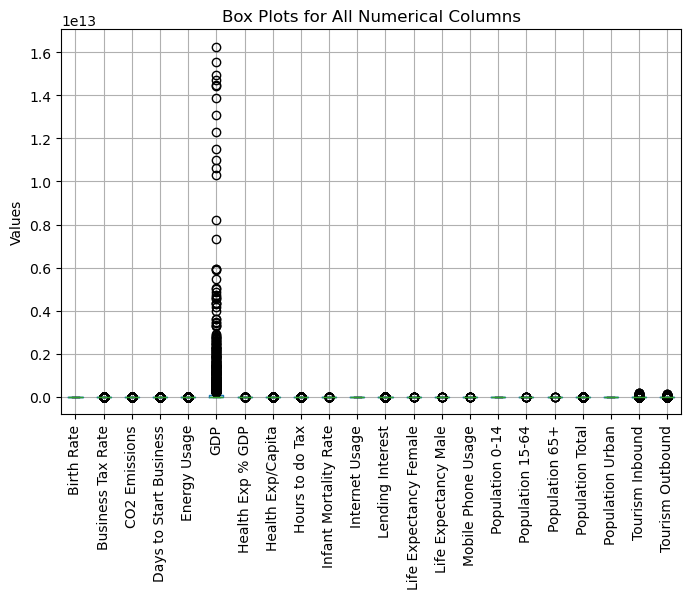

In [23]:
# Box plot for Outliers Detection
df[numerical_columns].boxplot(figsize=(8, 5))
plt.title("Box Plots for All Numerical Columns")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.show()

# Interpretation of the boxtplot
- From the above plot we can say that almost every column has outliers

# Bivariate Analysis

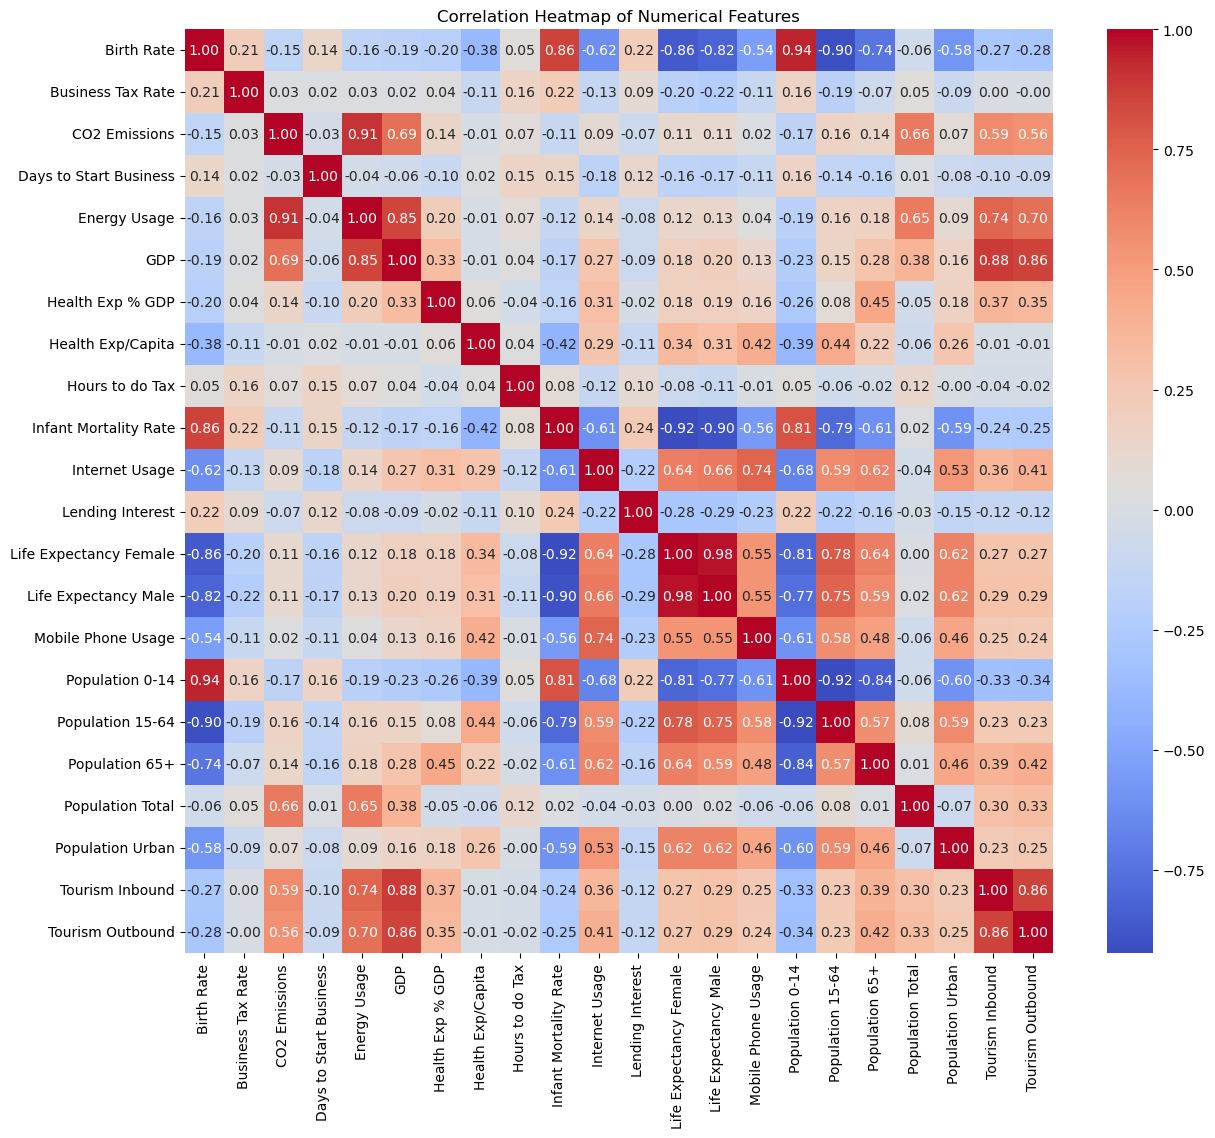

In [24]:
# Plotting a heatmap to visualize correlations among numeric features
plt.figure(figsize=(14, 12))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# What Does correlation plot says -
- Strong Positive Correlations:

  - Life Expectancy Female and Life Expectancy Male have a high positive correlation, indicating similar trends in life expectancy across genders.
  - Population Urban correlates with Internet Usage and Mobile Phone Usage, suggesting higher technology penetration in urban areas.
  - GDP and Energy Usage are positively correlated, which is typical for more industrialized nations.
        
- Negative Correlations:

   - Infant Mortality Rate is negatively correlated with Life Expectancy (both male and female), a common indicator of healthcare quality.
   - Birth Rate shows an inverse relationship with Life Expectancy, which can suggest demographic transitions in different regions.

# Multivariate Analysis

In [25]:
# Set correlation threshold
correlation_threshold = 0.85

# Initialize list to hold pairs of highly correlated features
high_correlation_pairs = []

# Loop through the correlation matrix, skipping NaN values
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if pd.notna(correlation_matrix.iloc[i, j]) and abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            high_correlation_pairs.append((correlation_matrix.columns[j], correlation_matrix.columns[i]))

# Print high correlation pairs
print("Highly correlated feature pairs:")
for pair in high_correlation_pairs:
    print(pair)

# Drop one feature from each correlated pair
features_to_drop = list(set([pair[1] for pair in high_correlation_pairs]))
data_reduced = df.drop(columns=features_to_drop, errors='ignore')

print("Selected features after feature selection:")
print(data_reduced.columns)


Highly correlated feature pairs:
('CO2 Emissions', 'Energy Usage')
('Energy Usage', 'GDP')
('Birth Rate', 'Infant Mortality Rate')
('Birth Rate', 'Life Expectancy Female')
('Infant Mortality Rate', 'Life Expectancy Female')
('Infant Mortality Rate', 'Life Expectancy Male')
('Life Expectancy Female', 'Life Expectancy Male')
('Birth Rate', 'Population 0-14')
('Birth Rate', 'Population 15-64')
('Population 0-14', 'Population 15-64')
('GDP', 'Tourism Inbound')
('GDP', 'Tourism Outbound')
('Tourism Inbound', 'Tourism Outbound')
Selected features after feature selection:
Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Health Exp % GDP', 'Health Exp/Capita',
       'Hours to do Tax', 'Internet Usage', 'Lending Interest',
       'Mobile Phone Usage', 'Population 65+', 'Population Total',
       'Population Urban'],
      dtype='object')


In [26]:
data_reduced

Birth Rate  Business Tax Rate  CO2 Emissions                   Country  \
0       0.020000               41.0        87931.0                   Algeria   
1       0.050000               41.0         9542.0                    Angola   
2       0.043000               41.0         1617.0                     Benin   
3       0.027000               41.0         4276.0                  Botswana   
4       0.046000               41.0         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699    0.022715               41.0         8529.0  Turks and Caicos Islands   
2700    0.013000               46.4         8529.0             United States   
2701    0.015000               41.9         8529.0                   Uruguay   
2702    0.020000               61.9         8529.0             Venezuela, RB   
2703    0.011000               41.0         8529.0     Virgin Islands (U.S.)   

      Days to Start Business  Health Exp % GDP  Health Exp/Capita  \
0                       26.0             0.035               60.0   
1                       26.0             0.034               22.0   
2                       26.0             0.043               15.0   
3                       26.0             0.047              152.0   
4                       26.0             0.051               12.0   
...                      ...               ...                ...   
2699                    26.0             0.061              115.5   
2700                     5.0             0.179              115.5   
2701                     7.0             0.089              115.5   
2702                   144.0             0.046              593.0   
2703                    26.0             0.061              115.5   

      Hours to do Tax  Internet Usage  Lending Interest  Mobile Phone Usage  \
0               239.0             0.0             0.100                 0.0   
1               239.0             0.0             1.032                 0.0   
2               239.0             0.0             0.120                 0.0   
3               239.0             0.0             0.155                 0.1   
4               239.0             0.0             0.120                 0.0   
...               ...             ...               ...                 ...   
2699            239.0             0.1             0.120                 0.5   
2700            175.0             0.8             0.033                 1.0   
2701            310.0             0.5             0.112                 1.5   
2702            792.0             0.5             0.164                 1.0   
2703            239.0             0.4             0.120                 0.5   

      Population 65+  Population Total  Population Urban  
0              0.039          31719449             0.599  
1              0.025          13924930             0.324  
2              0.029           6949366             0.383  
3              0.029           1755375             0.532  
4              0.028          11607944             0.178  
...              ...               ...               ...  
2699           0.052             32427             0.911  
2700           0.136         313873685             0.811  
2701           0.140           3395253             0.948  
2702           0.060          29954782             0.889  
2703           0.152            105275             0.949  

[2704 rows x 14 columns]

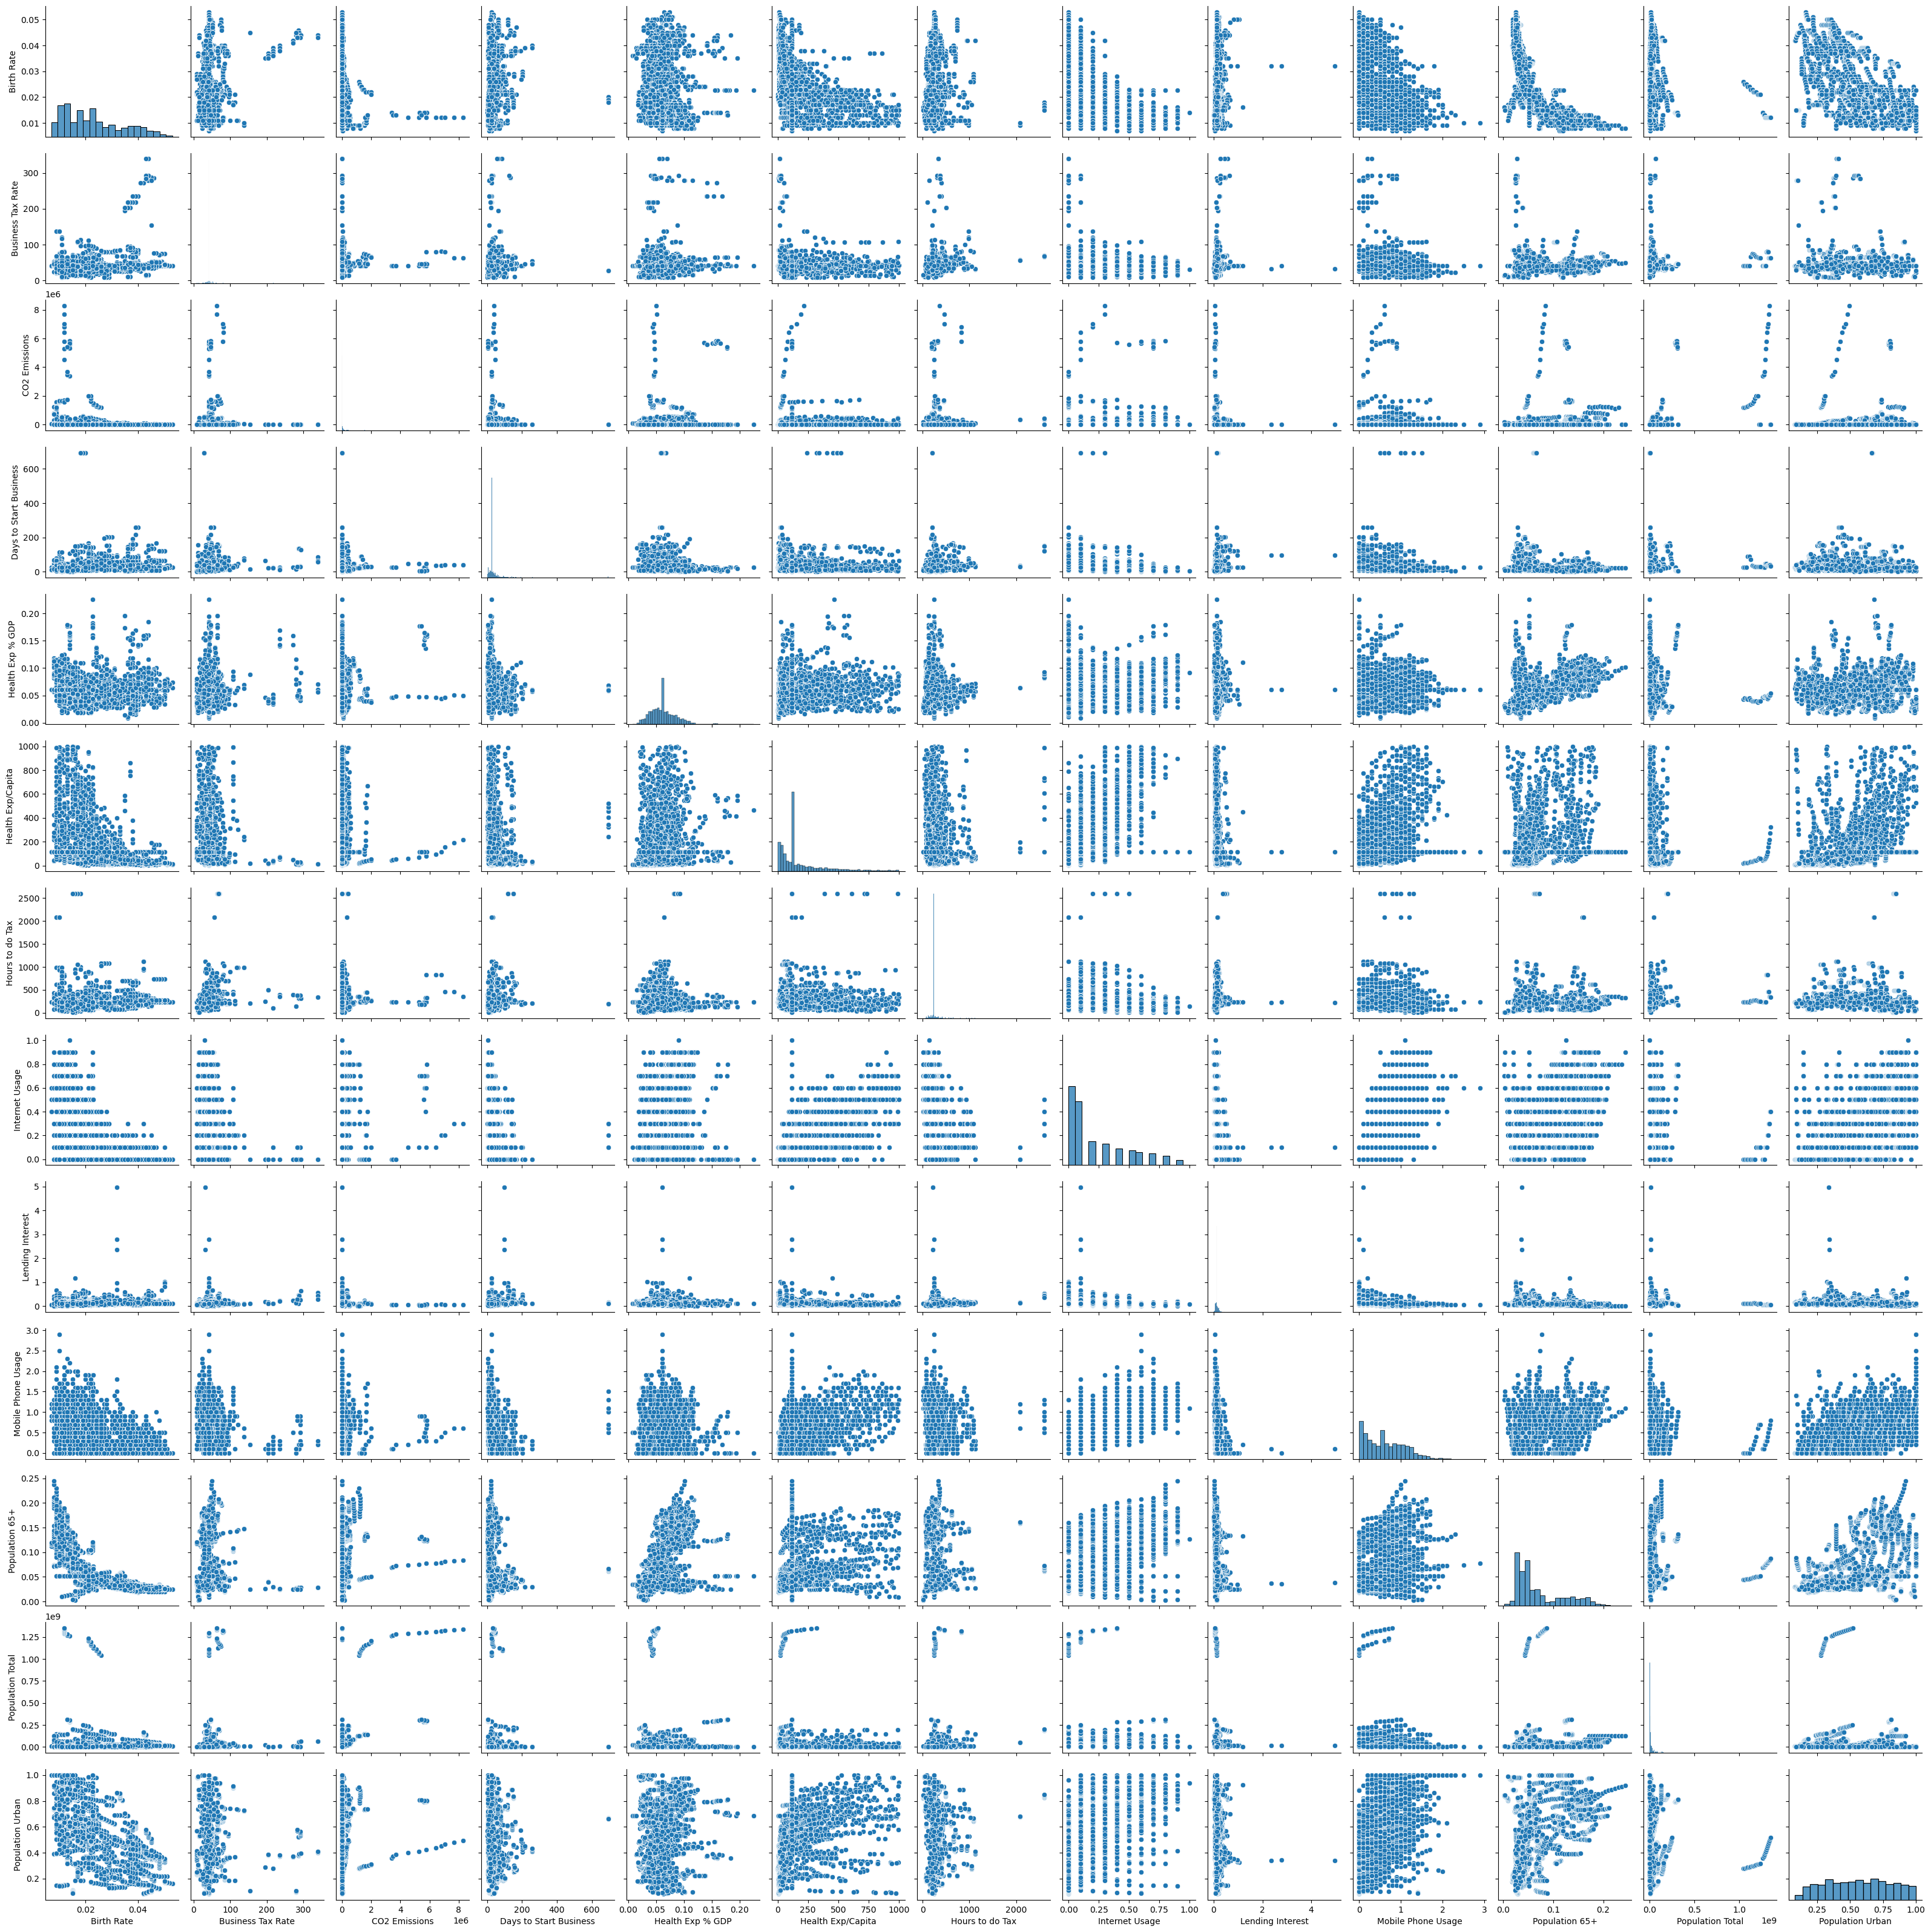

In [27]:
# Scatter plot for finding out the spread of the data across each column
sns.pairplot(data_reduced,palette='Type')

# Outliers Removal

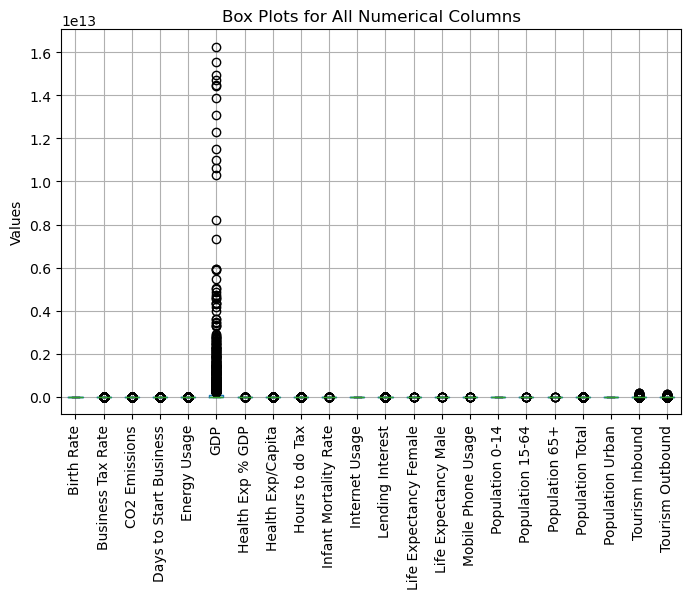

In [28]:
# Define a function to remove outliers based on IQR for selected columns
def outlier_detection(data, columns):

    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1

        # Define the lower and upper bounds for outliers
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)

        data[col] = np.where(data[col] > upper, upper, np.where(data[col] < lower, lower,data[col]))

# Remove outliers from the specified columns
outlier_detection(data_reduced,data_reduced.select_dtypes(include='number').columns)

# Box plot for Outliers Detection
df.boxplot(figsize=(8, 5))
plt.title("Box Plots for All Numerical Columns")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.show()

# LabelEncoder Interpretation
- LabelEncoder assigns a unique integer to each unique category in the y column.
- The dictionary output will show each unique category in y and its corresponding integer label.

In [29]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'y' column, converting it to integer labels
data_reduced['Country'] = label_encoder.fit_transform(data_reduced['Country'])

# Display the unique classes and their integer labels
print("Classes and their integer labels:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Classes and their integer labels:
{'Afghanistan': 0, 'Albania': 1, 'Algeria': 2, 'American Samoa': 3, 'Andorra': 4, 'Angola': 5, 'Antigua and Barbuda': 6, 'Argentina': 7, 'Armenia': 8, 'Aruba': 9, 'Australia': 10, 'Austria': 11, 'Azerbaijan': 12, 'Bahamas, The': 13, 'Bahrain': 14, 'Bangladesh': 15, 'Barbados': 16, 'Belarus': 17, 'Belgium': 18, 'Belize': 19, 'Benin': 20, 'Bermuda': 21, 'Bhutan': 22, 'Bolivia': 23, 'Bosnia and Herzegovina': 24, 'Botswana': 25, 'Brazil': 26, 'Brunei Darussalam': 27, 'Bulgaria': 28, 'Burkina Faso': 29, 'Burundi': 30, 'Cambodia': 31, 'Cameroon': 32, 'Canada': 33, 'Cayman Islands': 34, 'Central African Republic': 35, 'Chad': 36, 'Chile': 37, 'China': 38, 'Colombia': 39, 'Comoros': 40, 'Congo, Dem. Rep.': 41, 'Congo, Rep.': 42, 'Costa Rica': 43, "Cote d'Ivoire": 44, 'Croatia': 45, 'Cuba': 46, 'Curacao': 47, 'Cyprus': 48, 'Czech Republic': 49, 'Denmark': 50, 'Djibouti': 51, 'Dominica': 52, 'Dominican Republic': 53, 'Ecuador': 54, 'Egypt, Arab Rep.': 55, 'El Sa

# Pre-Processing and Feature Selection / Extraction

In [30]:
data_reduced

Birth Rate  Business Tax Rate  CO2 Emissions  Country  \
0       0.020000              41.00        87931.0        2   
1       0.050000              41.00         9542.0        5   
2       0.043000              41.00         1617.0       20   
3       0.027000              41.00         4276.0       25   
4       0.046000              41.00         1041.0       29   
...          ...                ...            ...      ...   
2699    0.022715              41.00         8529.0      193   
2700    0.013000              45.15         8529.0      198   
2701    0.015000              41.90         8529.0      199   
2702    0.020000              45.15         8529.0      202   
2703    0.011000              41.00         8529.0      204   

      Days to Start Business  Health Exp % GDP  Health Exp/Capita  \
0                     26.000             0.035             60.000   
1                     26.000             0.034             22.000   
2                     26.000             0.043             15.000   
3                     26.000             0.047            152.000   
4                     26.000             0.051             12.000   
...                      ...               ...                ...   
2699                  26.000             0.061            115.500   
2700                   5.000             0.118            115.500   
2701                   7.000             0.089            115.500   
2702                  55.625             0.046            456.125   
2703                  26.000             0.061            115.500   

      Hours to do Tax  Internet Usage  Lending Interest  Mobile Phone Usage  \
0              239.00             0.0            0.1000                 0.0   
1              239.00             0.0            0.2265                 0.0   
2              239.00             0.0            0.1200                 0.0   
3              239.00             0.0            0.1550                 0.1   
4              239.00             0.0            0.1200                 0.0   
...               ...             ...               ...                 ...   
2699           239.00             0.1            0.1200                 0.5   
2700           189.75             0.8            0.0330                 1.0   
2701           295.75             0.5            0.1120                 1.5   
2702           295.75             0.5            0.1640                 1.0   
2703           239.00             0.4            0.1200                 0.5   

      Population 65+  Population Total  Population Urban  
0              0.039      3.171945e+07             0.599  
1              0.025      1.392493e+07             0.324  
2              0.029      6.949366e+06             0.383  
3              0.029      1.755375e+06             0.532  
4              0.028      1.160794e+07             0.178  
...              ...               ...               ...  
2699           0.052      3.242700e+04             0.911  
2700           0.136      4.903473e+07             0.811  
2701           0.140      3.395253e+06             0.948  
2702           0.060      2.995478e+07             0.889  
2703           0.152      1.052750e+05             0.949  

[2704 rows x 14 columns]

In [31]:
# Storing all the Dependent columns in X variable AND Country column to Y
# Scaling the Data
sc = StandardScaler()
scaled_df = sc.fit_transform(data_reduced.drop(columns=['Country']))

In [32]:
selected_features = [
    'Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Days to Start Business',
    'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax', 'Internet Usage',
    'Lending Interest', 'Mobile Phone Usage', 'Population 65+', 'Population Total',
    'Population Urban'
]

# Convert to DataFrame with feature names
scaled_df = pd.DataFrame(scaled_df, columns=selected_features)

# Step 2: Add 'Country' column as the last column
scaled_df['Country'] = data_reduced['Country']

In [33]:
data1 = scaled_df.copy()    # For KMeans Clustering
data2 = scaled_df.copy()    # For Algomerative/Herarchical Clustering
data3 = scaled_df.copy()    # For DBSCAN Clustering

In [34]:
data2

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0      -0.244939          -0.064792       1.659733               -0.151075   
1       2.461670          -0.064792      -0.486142               -0.151075   
2       1.830128          -0.064792      -0.703087               -0.151075   
3       0.386604          -0.064792      -0.630298               -0.151075   
4       2.100789          -0.064792      -0.718855               -0.151075   
...          ...                ...            ...                     ...   
2699    0.000000          -0.064792      -0.513873               -0.151075   
2700   -0.876481           1.549489      -0.513873               -1.633604   
2701   -0.696040           0.285293      -0.513873               -1.492411   
2702   -0.244939           1.549489      -0.513873                1.940350   
2703   -1.056921          -0.064792      -0.513873               -0.151075   

      Health Exp % GDP  Health Exp/Capita  Hours to do Tax  Internet Usage  \
0            -1.266291          -0.728198        -0.048822       -0.908914   
1            -1.311467          -0.998304        -0.048822       -0.908914   
2            -0.904880          -1.048060        -0.048822       -0.908914   
3            -0.724175          -0.074256        -0.048822       -0.908914   
4            -0.543469          -1.069385        -0.048822       -0.908914   
...                ...                ...              ...             ...   
2699         -0.091706          -0.333700        -0.048822       -0.515114   
2700          2.483345          -0.333700        -1.486296        2.241482   
2701          1.173232          -0.333700         1.607557        1.060084   
2702         -0.769351           2.087484         1.607557        1.060084   
2703         -0.091706          -0.333700        -0.048822        0.666284   

      Lending Interest  Mobile Phone Usage  Population 65+  Population Total  \
0            -0.531416           -1.253652       -0.684821          1.090800   
1             2.067567           -1.253652       -0.978160          0.021270   
2            -0.120510           -1.253652       -0.894348         -0.397993   
3             0.598576           -1.034604       -0.894348         -0.710175   
4            -0.120510           -1.253652       -0.915301         -0.117991   
...                ...                 ...             ...               ...   
2699         -0.120510           -0.158413       -0.412434         -0.813732   
2700         -1.907953            0.936826        1.347600          2.131526   
2701         -0.284873            2.032065        1.431411         -0.611611   
2702          0.783484            0.936826       -0.244812          0.984736   
2703         -0.120510           -0.158413        1.682844         -0.809353   

      Population Urban  Country  
0             0.147333        2  
1            -0.976646        5  
2            -0.735502       20  
3            -0.126509       25  
4            -1.573377       29  
...                ...      ...  
2699          1.422539      193  
2700          1.013819      198  
2701          1.573765      199  
2702          1.332620      202  
2703          1.577852      204  

[2704 rows x 14 columns]

# KMeans Clustering 

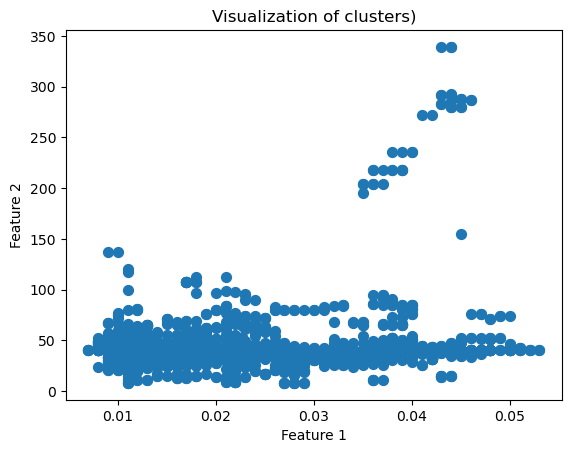

In [35]:
# Step 2: Visualize the data
# Plot the generated data to see the points before clustering
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s=50, cmap='viridis')
plt.title("Visualization of clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

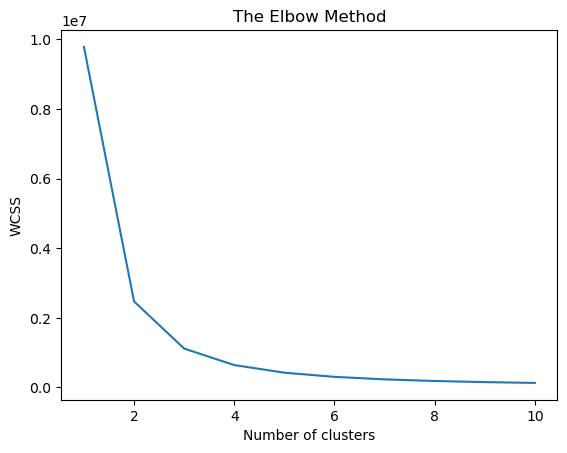

In [36]:
# Loop over potential cluster counts from 1 to 10
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
# selecting he no of clusters for our model
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
ypred = kmeans.fit_predict(data1)
ypred

array([2, 2, 2, ..., 1, 1, 1])

In [38]:
# visualizing the clusters and its centers
kmeans.cluster_centers_

array([[-2.74693154e-02,  1.98519691e-03,  1.01400985e-01,
        -2.51291604e-02, -5.76900526e-02, -1.41689073e-01,
         8.11069975e-02,  5.34483749e-02, -1.97285222e-02,
         7.63507836e-02,  6.60547434e-02,  7.65283655e-02,
         9.03442475e-02,  7.75000000e+01],
       [ 1.00938104e-01, -6.13893515e-02,  6.07559812e-02,
         9.12213479e-02, -1.16423160e-02,  1.53588658e-02,
        -1.66748583e-01, -6.42939660e-02,  2.34002026e-02,
        -4.24462228e-02, -8.22146618e-02,  8.21856820e-02,
        -2.22602309e-01,  1.82000000e+02],
       [-3.15878953e-02,  1.92736726e-01, -6.23998839e-02,
         1.29444548e-01, -3.75912593e-03,  5.13865761e-02,
         1.42687437e-01, -8.88378984e-03, -1.89991025e-02,
        -3.99778373e-02,  4.65742314e-02, -8.47244869e-02,
         1.40724499e-01,  2.55000000e+01],
       [-3.91861951e-02, -1.31975152e-01, -9.67285340e-02,
        -1.90126205e-01,  7.14927434e-02,  7.38193908e-02,
        -5.91157146e-02,  1.81440347e-02,  1.

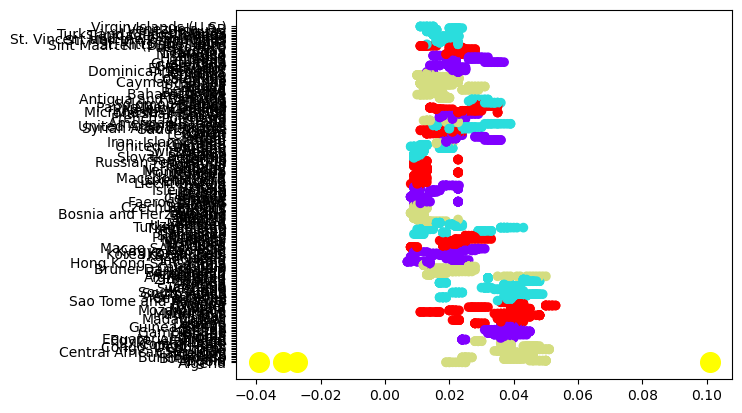

In [39]:
# Visualizing the clusters with the help of centers 
# Plot the data points colored by their predicted cluster, along with cluster centers
plt.scatter(df.iloc[:,0],df.iloc[:,3], c = ypred, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = 'yellow',s = 200)

# DBSCAN Clustering

In [40]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3).fit(data3)
distances, indices = neigh.kneighbors(data3)

In [41]:
distances,indices

(array([[0.        , 0.22454426, 0.33965718],
        [0.        , 0.4739372 , 1.08964396],
        [0.        , 0.10184941, 0.20324045],
        ...,
        [0.        , 0.36505172, 3.80183259],
        [0.        , 0.43203226, 2.65003498],
        [0.        , 0.14672644, 0.50399177]]),
 array([[   0,  208,  416],
        [   1,  417,  209],
        [   2,  418,  210],
        ...,
        [2701, 2493, 1869],
        [2702, 2494, 2286],
        [2703, 2495, 2287]], dtype=int64))

Text(0.5, 1.0, 'K-Distance Graph')

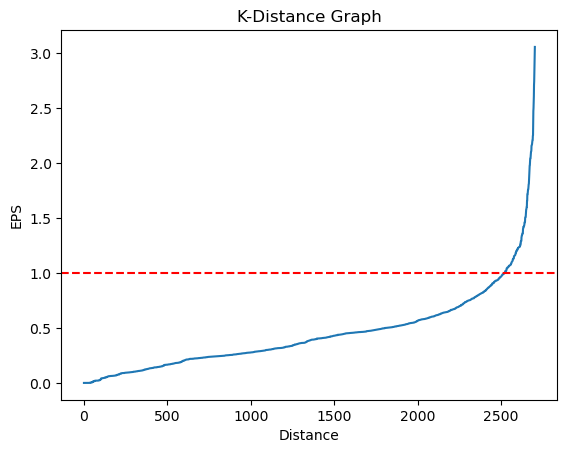

In [42]:
plt.plot(np.sort(distances[:,1]))
plt.axhline(y=1, linestyle = '--', color = 'red')
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

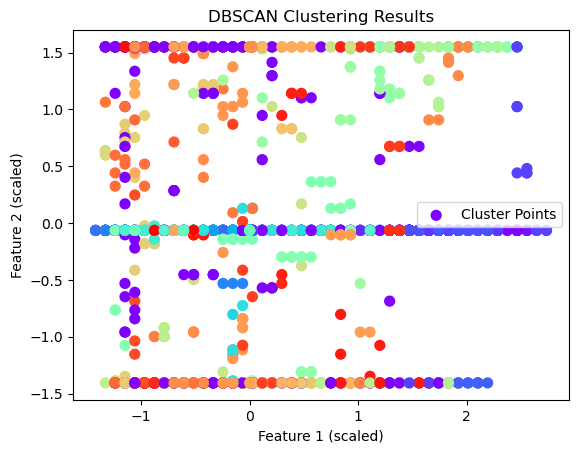

In [43]:
dbscan = DBSCAN(eps=1.5, min_samples=3)
ypredDB = dbscan.fit_predict(data3)  # Fit the model and get the cluster labels

# Step 4: Visualize the Clusters
# DBSCAN labels: -1 means noise, other integers represent different clusters
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
plt.scatter(data3.iloc[:, 0], data3.iloc[:, 1], c=ypredDB, cmap='rainbow', s=50, label="Cluster Points")
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.show()

In [44]:
for value in ypredDB:
    print(value)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
167
21
22
23
24
25
26
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
-1
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
188
83
84
85
86
-1
87
88
89
90
91
92
93
94
95
96
-1
97
190
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
191
113
114
192
115
-1
193
-1
116
117
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
83
-1
134
135
136
137
138
139
140
141
142
143
144
145
146
147
-1
148
149
150
151
152
153
154
155
156
194
157
158
159
160
161
162
163
164
165
166
167
168
169
169
170
195
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
21
22
23
24
25
26
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
-1
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
188
83
84
85
86
-1
87
88
89
90
91
92


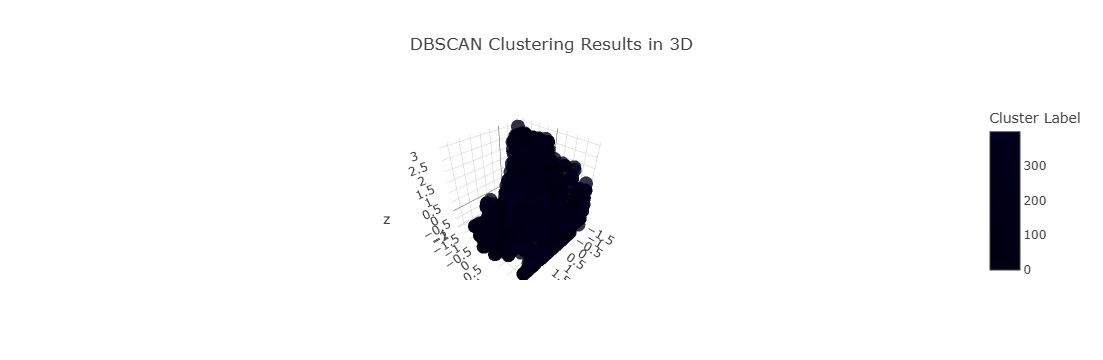

In [45]:
import plotly.express as px
px.scatter_3d(df, x=data3.iloc[:, 0], y=data3.iloc[:,3], z=data3.iloc[:,7], 
                    color=ypredDB,  # Convert cluster labels to strings for categorical colors
                    title="DBSCAN Clustering Results in 3D",
                    labels={'color': 'Cluster Label'},
                    opacity=0.8)


# Agglomerative / Hierarchical Clustering

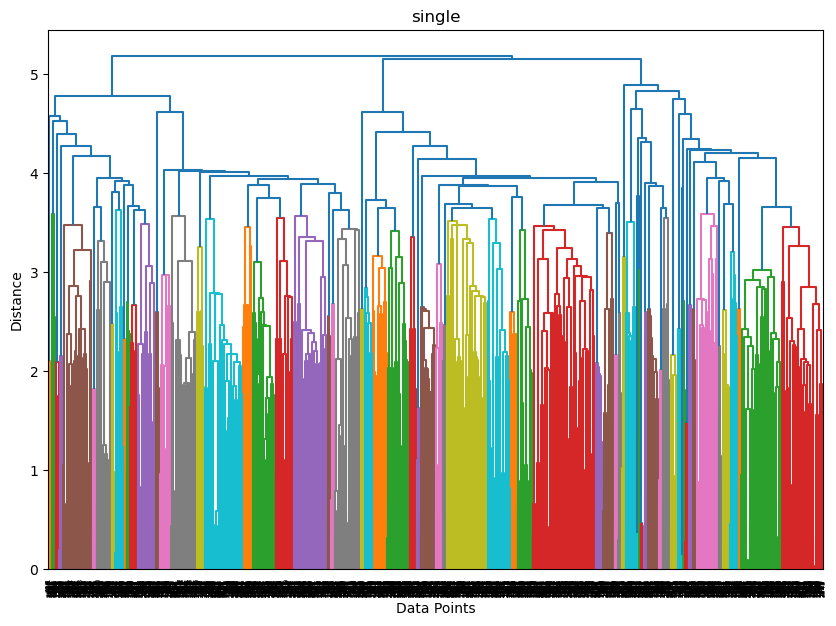

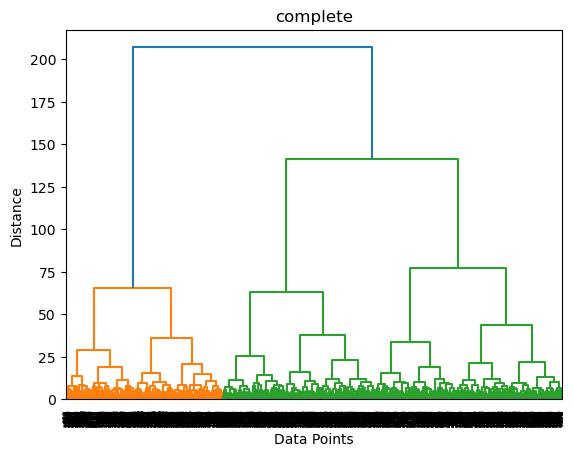

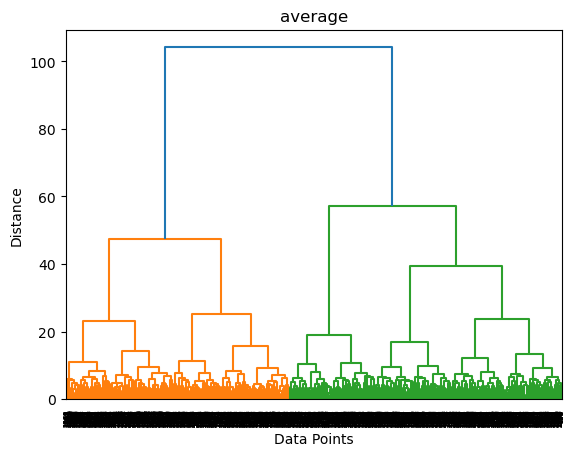

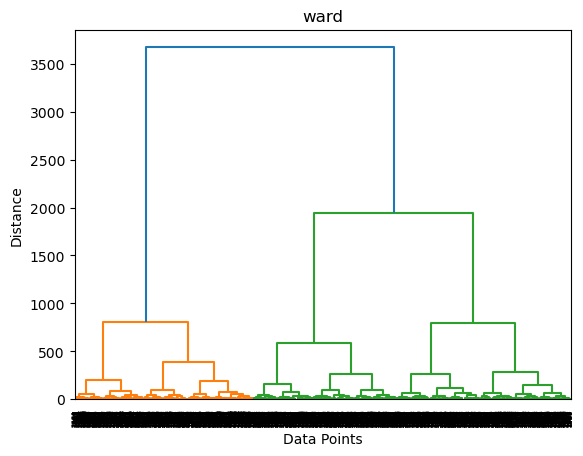

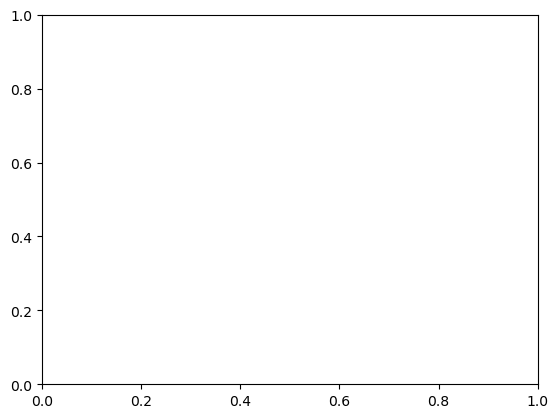

In [46]:
# For Loop over each linkage method forgenerating the dendrogram, and displaying it
Linkage=['single','complete','average','ward']
plt.figure(figsize=(10, 7))
for i, method in enumerate(Linkage):
    lk = hierarchy.linkage(data2, method=method)
    dendrogram = hierarchy.dendrogram(lk)
    plt.title(method)
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()
    plt.subplot()

In [47]:
data2

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0      -0.244939          -0.064792       1.659733               -0.151075   
1       2.461670          -0.064792      -0.486142               -0.151075   
2       1.830128          -0.064792      -0.703087               -0.151075   
3       0.386604          -0.064792      -0.630298               -0.151075   
4       2.100789          -0.064792      -0.718855               -0.151075   
...          ...                ...            ...                     ...   
2699    0.000000          -0.064792      -0.513873               -0.151075   
2700   -0.876481           1.549489      -0.513873               -1.633604   
2701   -0.696040           0.285293      -0.513873               -1.492411   
2702   -0.244939           1.549489      -0.513873                1.940350   
2703   -1.056921          -0.064792      -0.513873               -0.151075   

      Health Exp % GDP  Health Exp/Capita  Hours to do Tax  Internet Usage  \
0            -1.266291          -0.728198        -0.048822       -0.908914   
1            -1.311467          -0.998304        -0.048822       -0.908914   
2            -0.904880          -1.048060        -0.048822       -0.908914   
3            -0.724175          -0.074256        -0.048822       -0.908914   
4            -0.543469          -1.069385        -0.048822       -0.908914   
...                ...                ...              ...             ...   
2699         -0.091706          -0.333700        -0.048822       -0.515114   
2700          2.483345          -0.333700        -1.486296        2.241482   
2701          1.173232          -0.333700         1.607557        1.060084   
2702         -0.769351           2.087484         1.607557        1.060084   
2703         -0.091706          -0.333700        -0.048822        0.666284   

      Lending Interest  Mobile Phone Usage  Population 65+  Population Total  \
0            -0.531416           -1.253652       -0.684821          1.090800   
1             2.067567           -1.253652       -0.978160          0.021270   
2            -0.120510           -1.253652       -0.894348         -0.397993   
3             0.598576           -1.034604       -0.894348         -0.710175   
4            -0.120510           -1.253652       -0.915301         -0.117991   
...                ...                 ...             ...               ...   
2699         -0.120510           -0.158413       -0.412434         -0.813732   
2700         -1.907953            0.936826        1.347600          2.131526   
2701         -0.284873            2.032065        1.431411         -0.611611   
2702          0.783484            0.936826       -0.244812          0.984736   
2703         -0.120510           -0.158413        1.682844         -0.809353   

      Population Urban  Country  
0             0.147333        2  
1            -0.976646        5  
2            -0.735502       20  
3            -0.126509       25  
4            -1.573377       29  
...                ...      ...  
2699          1.422539      193  
2700          1.013819      198  
2701          1.573765      199  
2702          1.332620      202  
2703          1.577852      204  

[2704 rows x 14 columns]

<Axes: xlabel='Business Tax Rate', ylabel='CO2 Emissions'>

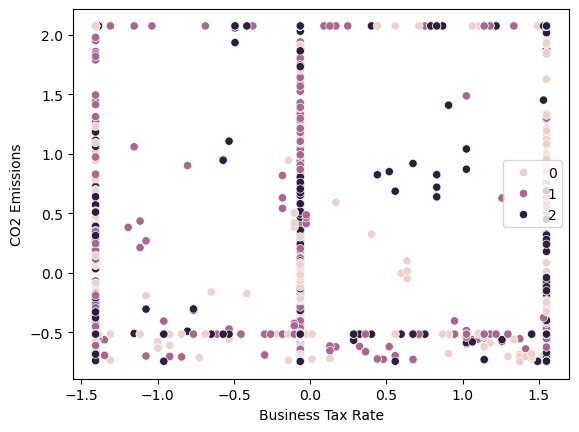

In [48]:
# Making the clusters with the optimized no of clusters concluded form the WARD Linkage method
hc = AgglomerativeClustering(n_clusters =3, affinity = 'euclidean', linkage = 'ward')
ypredaglo = hc.fit_predict(data2)
data2['Cluster'] = ypredaglo

# Visualizing the clusters 
sns.scatterplot(x = data2.iloc[:,1], y = data2.iloc[:,2], hue = ypredaglo)

In [49]:
len(data2)

2704

In [50]:
data2.groupby('Cluster').agg('mean')

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
Cluster                                                                         
0         -0.024812           0.174283      -0.084344                0.081106   
1          0.022356          -0.148512      -0.003956               -0.089396   
2          0.003815          -0.037164       0.110244                0.007383   

         Health Exp % GDP  Health Exp/Capita  Hours to do Tax  Internet Usage  \
Cluster                                                                         
0               -0.024799           0.021337         0.113609        0.042667   
1                0.044156          -0.058453         0.011191       -0.019234   
2               -0.022725           0.044447        -0.155627       -0.029933   

         Lending Interest  Mobile Phone Usage  Population 65+  \
Cluster                                                         
0               -0.017889            0.000313        0.084759   
1                0.013100            0.000622       -0.087070   
2                0.006423           -0.001148       -0.000014   

         Population Total  Population Urban  Country  
Cluster                                               
0               -0.084530          0.128104     37.0  
1                0.019832         -0.013410    111.0  
2                0.081534         -0.143815    177.5

In [51]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores for each clustering result
silhouette_kmeans = silhouette_score(data1, ypred)
silhouette_dbscan = silhouette_score(data2, ypredDB)
silhouette_agglomerative = silhouette_score(data3, ypredaglo)

# Print the Silhouette Scores
print(f"Silhouette Score for KMeans on data1: {silhouette_kmeans:.3f}")
print(f"Silhouette Score for DBSCAN on data2: {silhouette_dbscan:.3f}")
print(f"Silhouette Score for Agglomerative Clustering on data3: {silhouette_agglomerative:.3f}")

Silhouette Score for KMeans on data1: 0.549
Silhouette Score for DBSCAN on data2: 0.456
Silhouette Score for Agglomerative Clustering on data3: 0.573


- A score close to 1 suggests that the clusters are dense and well-separated.
- A score around 0 suggests overlapping clusters.
- A negative score suggests that samples may have been assigned to the wrong clusters.

In [52]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])]  # Scale columns 0-12
    ) 


from sklearn.pipeline import Pipeline
model = Pipeline(steps=[
    ('transformer', transformer),  # Apply the column transformer
    ('model', AgglomerativeClustering(n_clusters=3))  # Apply AgglomerativeClustering with 3 clusters
])


# Now fit the model
model.fit(data_reduced)
model.fit(data_reduced)
ypred = model.fit_predict(data_reduced)


import pickle
import streamlit
with open('Agglo.pkl', 'wb') as f:
    pickle.dump(model, f)